![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Authors:** Mengwen Tu
***

## Overview

This project provides Microsoft some suggestions on movie investment, by analysis of the data available on [IMDb](https://www.imdb.com/) and [The Numbers](https://www.the-numbers.com/), two online database that track film information, including movie genres, production crew, budget and box office revenue etc. Descriptive analysis shows that movie production budget and the net profit has a positive correlation, which means the higher budget tend to get a higher profit. The investigation also shows that Animation, adventure, Sci-Fi, Fantasy, Action are the 5 most profitable movie genres. In addition, it seems that director with more experience tend to make a more profitable movie. However, on  the other hand, high profit doesn't mean a high ROI (Return on Investment). If Microsoft would like to get a high ROI, then smaller budget invest on Horror, Mystery, Thriller, Sport, Biography may be a good choice. 

## Business Problem

Microsoft has decided to create a new movie studio, and would like to know what parameters will affect the final success of the movie. Using the available data, we can investigate whether movie production budget, genres, and director experience has influence on the profit and ROI of the movie.

## Data Understanding
The data were collected from :
1. [IMDb](https://www.imdb.com/), an online database of films, including film production crew and personal biographies, genres, ratings and so on.
2. [The Numbers](https://www.the-numbers.com/), a film industry data website that tracks box office revenue in a systematic, algorithmic way. 

By combining information of both, we can study the relationship between genres, budget, production crew with the movie profit and ROI. 

### Import Standard Packages

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Movie Budget and Gross Income

In [2]:
# Load the data with pandas
movie_budget = pd.read_csv('tn.movie_budgets.csv')
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Inspect the contents of the dataframe:

In [3]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Convert budget and gross into integer so we can calculate net profit and  ROI (Return on Investment) of each film. 

In [4]:
#convert domestic gross to integer
movie_budget['domestic_gross'] = [num.strip('$') for num in movie_budget['domestic_gross'] ]
movie_budget['domestic_gross'] = [num.replace(',','') for num in movie_budget['domestic_gross']]
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].astype(int)


#convert worldwide gross to integer
movie_budget['worldwide_gross'] = [num.strip('$') for num in movie_budget['worldwide_gross'] ]
movie_budget['worldwide_gross'] = [num.replace(',','') for num in movie_budget['worldwide_gross']]
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].astype(int)

#convert budget to integer
movie_budget['production_budget'] = [num.strip('$') for num in movie_budget['production_budget'] ]
movie_budget['production_budget'] = [num.replace(',','') for num in movie_budget['production_budget']]
movie_budget['production_budget'] = movie_budget['production_budget'].astype(int)


In [5]:
#Add two columns, net_profit and ROI to the dataframe. 
movie_budget['net_profit'] = movie_budget['worldwide_gross'] - movie_budget['production_budget']
movie_budget['ROI'] = movie_budget['net_profit']/movie_budget['production_budget']
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696


Investigate if any missing data, or duplicates in the dataframe: 

In [6]:
movie_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
net_profit           0
ROI                  0
dtype: int64

In [7]:
movie_budget.duplicated().value_counts()

False    5782
dtype: int64

There is no missing data or duplicates in the dataframe. 

### Movie Information

Now we will use IMDb database to get information of movie genres, director information, and rating. 

In [8]:
# Load the imdb data with sqlite3
import sqlite3
conn = sqlite3.Connection('im.db')

In [9]:
#Query im.db database to get movie title, genres, rating, and director name
q = """SELECT DISTINCT b.primary_title AS movie, b.genres,r.averagerating, p.primary_name AS director_name
       FROM movie_basics AS b
       JOIN movie_ratings AS r
       USING (movie_id)
       JOIN directors AS d
       USING (movie_id)
       JOIN persons AS p
       USING (person_id)
       ORDER BY averagerating DESC;"""
movie_info = pd.read_sql(q, conn)
movie_info.duplicated().value_counts()

False    85949
dtype: int64

In [10]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85949 entries, 0 to 85948
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie          85949 non-null  object 
 1   genres         85151 non-null  object 
 2   averagerating  85949 non-null  float64
 3   director_name  85949 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.6+ MB


Investigate if there is any duplicates or missing data in the dataframe

In [11]:
movie_info.duplicated().value_counts()

False    85949
dtype: int64

In [12]:
movie_info.isna().sum()

movie              0
genres           798
averagerating      0
director_name      0
dtype: int64

Compare with 85,949 results, 798 is only 0.9% of data, we will keep it at this point. 

## Merge Movie Budget with Movie Information

Since we want to study how the movie parameters (budget, genre, director) will affect on the profit and ROI of movies, it's important to have both movie information data and budget data available same time. So I choose to use an inner merge of the two database. 

In [13]:
df_merged = movie_budget.merge(movie_info, on='movie', how = 'inner')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 0 to 3188
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3189 non-null   int64  
 1   release_date       3189 non-null   object 
 2   movie              3189 non-null   object 
 3   production_budget  3189 non-null   int64  
 4   domestic_gross     3189 non-null   int64  
 5   worldwide_gross    3189 non-null   int64  
 6   net_profit         3189 non-null   int64  
 7   ROI                3189 non-null   float64
 8   genres             3181 non-null   object 
 9   averagerating      3189 non-null   float64
 10  director_name      3189 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 299.0+ KB


In [14]:
df_merged.duplicated().value_counts()

False    3189
dtype: int64

In [15]:
df_merged.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
net_profit           0
ROI                  0
genres               8
averagerating        0
director_name        0
dtype: int64

There are only 8 missing genre in the dataframe, compared with 3189 total data, it's only 0.2% of the data and shouldn't have a great effect on the final result, so I decided to keep it. 

## Data Preparation

### Data Cleaning

By investigating the 'genres' column, we can see there are multiple genres in one movie result. Therefore we will split the value so each row only has one genre. 

In [16]:
#Split genres into individual genre, by using split() and explode()
df_merged['genre'] = df_merged['genres'].str.split(',')
total = df_merged.explode('genre')
total.duplicated().value_counts()

False    7076
dtype: int64

In [17]:
total.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,genres,averagerating,director_name,genre
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577,Horror,6.1,Atsushi Wada,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,"Action,Adventure,Fantasy",6.6,Rob Marshall,Action
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,"Action,Adventure,Fantasy",6.6,Rob Marshall,Adventure
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,"Action,Adventure,Fantasy",6.6,Rob Marshall,Fantasy
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108,"Action,Adventure,Sci-Fi",6.0,Simon Kinberg,Action


In [18]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7076 entries, 0 to 3188
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7076 non-null   int64  
 1   release_date       7076 non-null   object 
 2   movie              7076 non-null   object 
 3   production_budget  7076 non-null   int64  
 4   domestic_gross     7076 non-null   int64  
 5   worldwide_gross    7076 non-null   int64  
 6   net_profit         7076 non-null   int64  
 7   ROI                7076 non-null   float64
 8   genres             7068 non-null   object 
 9   averagerating      7076 non-null   float64
 10  director_name      7076 non-null   object 
 11  genre              7068 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 718.7+ KB


At this step we have a comprehensive dataframe with all target variables we want to investigate.

## Data Analysis

First, I would like to study the correlation of production budget and net profit, to see if a higher-budget film will do better job gaining absolute profit. 

In [19]:
correlation_np = total.corr()['net_profit']
correlation_np = correlation_np.drop (labels = ['id','net_profit'])
correlation_np

production_budget    0.660947
domestic_gross       0.941424
worldwide_gross      0.985392
ROI                  0.105298
averagerating        0.215743
Name: net_profit, dtype: float64

Second, I would like to study the correlation of production budget and ROI, to investigate whether big budget will gain higher ROI?

In [20]:
correlation_roi = total.corr()['ROI']
correlation_roi = correlation_roi.drop (labels = ['id','ROI'])
correlation_roi

production_budget   -0.050662
domestic_gross       0.092770
worldwide_gross      0.076469
net_profit           0.105298
averagerating       -0.005982
Name: ROI, dtype: float64

The result shows that correlation of production budget and net profit is 0.66, a medium-strong correlation. The average rating also has a postive correlation with net profit, but not very strong (only 0.2). This indicates that some good rating movie doesn't necessarily mean a profitable movie. 

On the other hand, production budget and average rating both have a negative correlation with ROI. This shows that big budget not necessarily bring a good return rate on investment. 

### Relationship Between Movie Buget and Profit

Let's make a visualization to show the relationship between investment budget and profit.

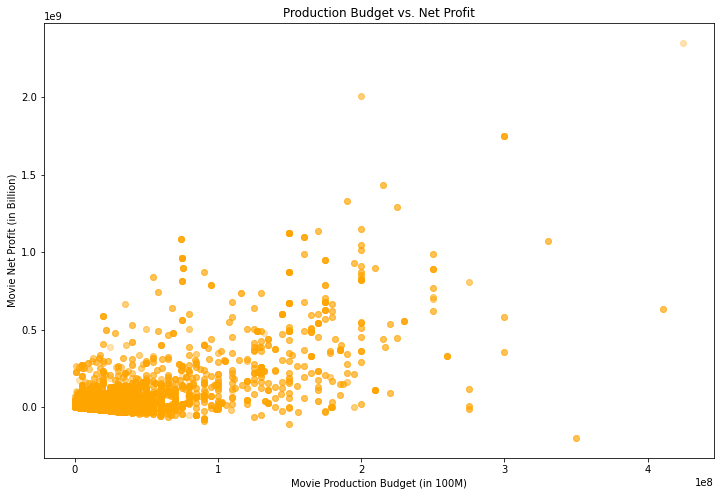

In [21]:
#relationship between budget and profit --- scatter plot
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(total['production_budget'], total['net_profit'],alpha=0.3, color="orange")

ax.set_title("Production Budget vs. Net Profit")
ax.set_xlabel("Movie Production Budget (in 100M)")
ax.set_ylabel("Movie Net Profit (in Billion)")
plt.savefig('images/buget_profit.png')

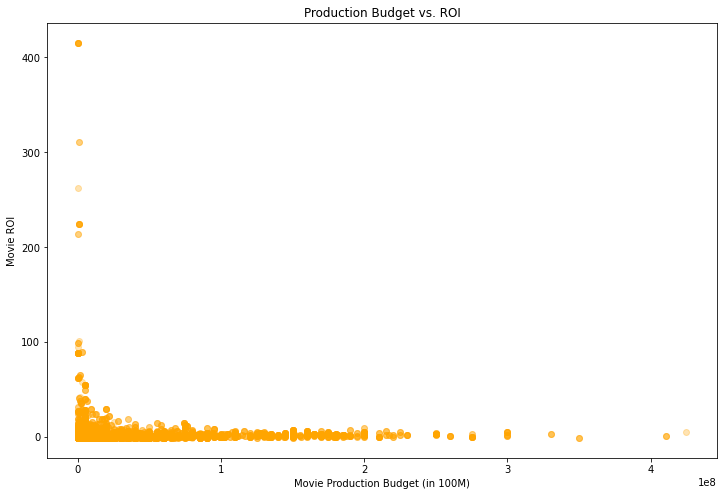

In [22]:
#relationship between budget and ROI --- scatter plot
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(total['production_budget'], total['ROI'],alpha=0.3, color="orange")

ax.set_title("Production Budget vs. ROI")
ax.set_xlabel("Movie Production Budget (in 100M)")
ax.set_ylabel("Movie ROI")
plt.savefig('images/buget_roi.png')

The above two scatter plot shows that higher budget tend to gain higher profit. 

On the other hand, however, many low budget movies tend to get high return on investment. 

### Relationship Between Movie Genre and Profit

Investigate genres, to check what kind of genre value in this dataframe. 

In [23]:
total['genre'].value_counts()

Drama          1587
Comedy          881
Action          679
Thriller        536
Adventure       522
Horror          392
Crime           377
Romance         339
Documentary     248
Mystery         243
Sci-Fi          219
Biography       203
Animation       192
Fantasy         179
Family          162
Music            80
History          74
Sport            69
War              41
Musical          23
Western          17
News              5
Name: genre, dtype: int64

Group by each genre to calculate the average profit of each genre.

In [24]:
genre_profit = total.groupby('genre').mean().sort_values(by = 'net_profit')
genre_profit.head(10)

,id,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,averagerating
genre,,,,,,,
War,49.170732,2.375610e+07,2.030195e+07,4.369567e+07,1.993958e+07,0.438865,6.446341
News,38.800000,1.932000e+07,1.127706e+07,4.392170e+07,2.460170e+07,1.312152,6.760000
Documentary,48.294355,2.137064e+07,2.793245e+07,5.502641e+07,3.365577e+07,3.063688,7.145565
Drama,51.105230,2.344687e+07,2.884931e+07,6.137088e+07,3.792401e+07,2.680697,6.434026
History,48.770270,3.131095e+07,3.345418e+07,7.006092e+07,3.874998e+07,2.246554,6.828378
Crime,50.381963,2.766338e+07,3.154111e+07,6.792505e+07,4.026168e+07,1.357063,6.278249
Western,47.882353,4.587059e+07,4.555825e+07,8.699831e+07,4.112772e+07,0.546899,6.458824
Romance,53.008850,2.015052e+07,2.883443e+07,6.217852e+07,4.202800e+07,3.522626,6.277286
Horror,53.918367,1.844480e+07,2.802184e+07,6.301613e+07,4.457132e+07,7.965323,5.382398


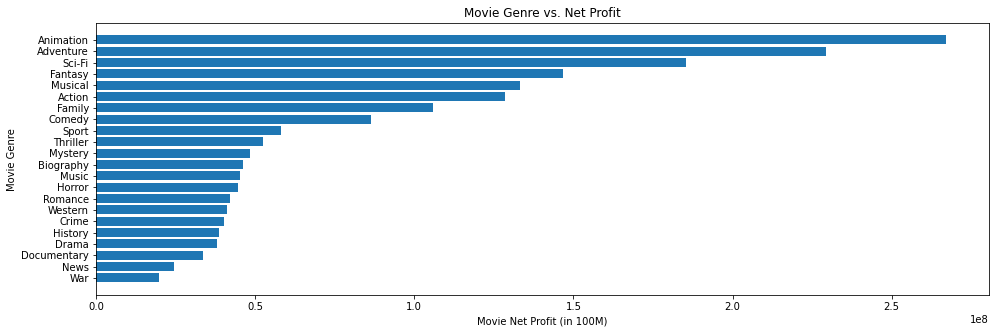

In [25]:
#Make a scatter chart to show profit by each genres
fig, ax = plt.subplots(figsize = (16,5))
ax.barh(genre_profit.index, genre_profit['net_profit'])

ax.set_title("Movie Genre vs. Net Profit")
ax.set_xlabel("Movie Net Profit (in 100M)")
ax.set_ylabel("Movie Genre")
plt.savefig('images/genre_profit.png')

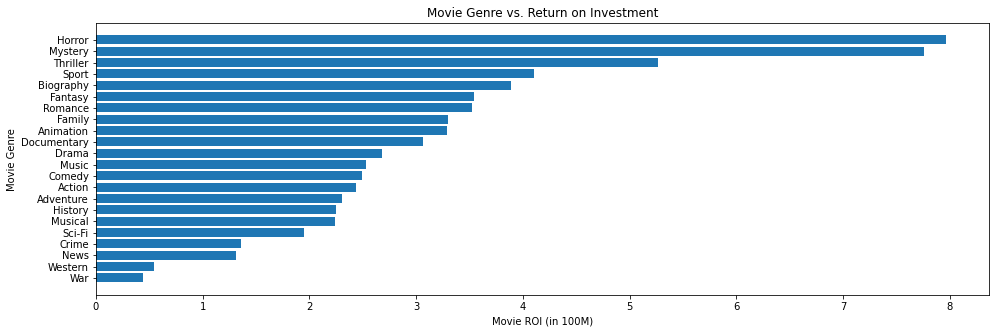

In [26]:
#Make a scatter chart to show ROI by each genres
genre_ROI = total.groupby('genre').mean().sort_values(by = 'ROI')
fig, ax = plt.subplots(figsize = (16,5))
ax.barh(genre_ROI.index, genre_ROI['ROI'])

ax.set_title("Movie Genre vs. Return on Investment")
ax.set_xlabel("Movie ROI (in 100M)")
ax.set_ylabel("Movie Genre")
plt.savefig('images/genre_roi.png')

From this bar chart we can know that the most 5 profitable movie genres are Animation, Adventure, Science-Fiction, Fantasy and Action. 
On the other hand, the top 5 ROI movie genres are Horror, Mystery, Thriller, Sport and Biography.

### Relationship Between Director Experience and Profit

Director might be another key factor whether a movie can be success or not. Therefore I would like to investigate with respect to director's experience, if higher movie counts associates with a higher profit. 

In [27]:
director_movie_count = total['director_name'].value_counts()
director_movie_count

Steven Spielberg     21
Ridley Scott         21
Steven Soderbergh    20
Clint Eastwood       20
Tim Burton           18
                     ..
Marcin Teodoru        1
Cara Greene           1
Nathan Waters         1
Wojciech Klimala      1
Tony Chan             1
Name: director_name, Length: 2411, dtype: int64

There are 2411 different directors in the dataframe, thus it makes no sense to plot relationship between each director with the profit. However by investigating the relationship between movie counts per director and the average profit the movie gained, we can understand whether director's experience will affect the profit or not. 

In [28]:
#Create dataframe grouped by director's name, and add a column of each person's movie count
director_profit = total.groupby('director_name').mean()
director_profit = director_profit.reset_index()
director_profit ['movie_count'] = director_profit['director_name'].map(director_movie_count)
director_profit.sort_values(by = 'net_profit',ascending = False)

,director_name,id,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,averagerating,movie_count
187,Atsushi Wada,1.0,425000000.0,760507625.0,2.776345e+09,2.351345e+09,5.532577,6.1,1
1250,Kevin Lincoln,43.0,200000000.0,659363944.0,2.208208e+09,2.008208e+09,10.041042,6.2,1
1718,Pete Meads,43.0,200000000.0,659363944.0,2.208208e+09,2.008208e+09,10.041042,6.2,1
357,Chi-kin Kwok,56.0,150000000.0,400738009.0,1.272470e+09,1.122470e+09,7.483133,5.4,2
363,Chris Buck,56.0,150000000.0,400738009.0,1.272470e+09,1.122470e+09,7.483133,7.5,3
...,...,...,...,...,...,...,...,...,...
197,Bambang Drias,78.0,90000000.0,8224288.0,1.055142e+07,-7.944858e+07,-0.882762,5.8,1
487,Daniel Beard,78.0,90000000.0,8224288.0,1.055142e+07,-7.944858e+07,-0.882762,8.8,1
2178,Terry George,78.0,90000000.0,8224288.0,1.055142e+07,-7.944858e+07,-0.882762,6.1,2
2056,Simon Wells,94.0,150000000.0,21392758.0,3.954976e+07,-1.104502e+08,-0.736335,5.4,3


In [29]:
director_profit['movie_count'].value_counts()

3     801
1     688
2     505
6     155
4      58
5      54
9      52
7      18
8      17
12     15
10     12
11     12
15      8
14      7
21      2
16      2
18      2
20      2
13      1
Name: movie_count, dtype: int64

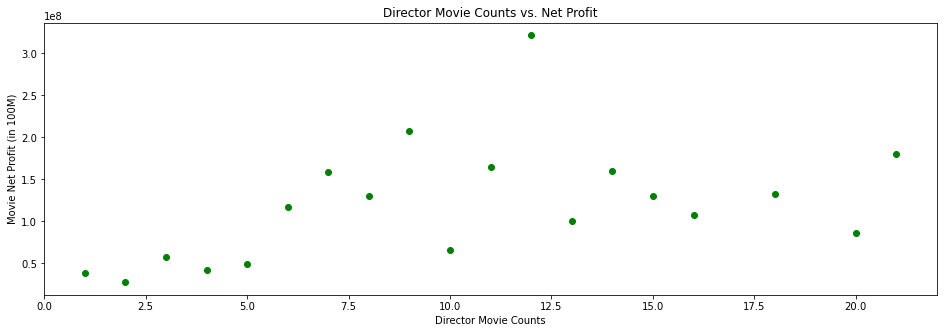

In [30]:
movie_count_profit= director_profit.groupby('movie_count').mean()
movie_count_profit= movie_count_profit.reset_index()
fig,ax = plt.subplots(figsize=(16, 5))
ax.scatter(movie_count_profit['movie_count'], movie_count_profit['net_profit'], color="green")

ax.set_title("Director Movie Counts vs. Net Profit")
ax.set_xlabel("Director Movie Counts")
ax.set_ylabel("Movie Net Profit (in 100M)")

movie_count_profit.corr()['net_profit']
plt.savefig('images/director_profit.png')

The result shows the directors who had made more than 5 movies gained higher average profit on the movie they made. 

## Conclusions

This analysis leads to three recommendations for Microsoft, in order to make achievement in the movie production: 
*  **Invest higher budget will likely to gain higher profit, while low budget turns to get high ROI** It seems production budget and movie profit has a postive correlation, which means higher budget may bring in higher profit. However, based on the budget-ROI result, it might also be a good idea if Microsoft wants to use a small amount of budget to test the market.
*  **Consider making movie in genres that are more profitable**  The five most profitable movie genres are Animation, Adventure, Science-Fiction, Fantasy and Action. And on the other hand, the top 5 ROI movie genres are Horror, Mystery, Thriller, Sport and Biography.
*  **Consider using more experienced directors** Directors with more than 5 movies tend to earn higher average profit, than directors with less than 5 movies' experience. 


### Next Step
Further analysis could yield additional recommendation:
* Investigate what budget range for each profitable genre that could bring better profit.
* Investigate the most profitable director for each profitable genre.